**ATENÇÃO: Você pode usar outras versões dos pacotes como também outras ferramentas de visualização de dados no lugar do `seaborn`, como exemplo o `plotly`!!!**

In [ ]:
!pip install -U seaborn --quiet

In [ ]:
!pip install pandas==1.1.4 --quiet

     |████████████████████████████████| 9.5 MB 5.3 MB/s 


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.style.use('seaborn')

df = pd.read_csv("titanic.csv").set_index("id_passageiro")
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,numero_bilhete,preco_bilhete,cabine_numero,local_embarque
id_passageiro,,,,,,,,,,
1,False,3,M,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,True,1,F,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,True,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,True,1,F,35.0,1,0,113803,53.1000,C123,Southampton
5,False,3,M,35.0,0,0,373450,8.0500,NaN,Southampton


# EDA 
Aqui vamos iniciar a parte de exploratório, as categorias do DataFrame já foram previamente identificadas, mas nada impede que você faça transformações para estas. Fique livre para identificar novos pontos e trazer para a sua defesa no futuro.

Novamente: **Perguntas guias** ou **Perguntas chaves** devem ser respondidas diretamente por você durante a elaboração do notebook, sempre com dados reforçando seus argumentos.




In [ ]:
numerica = [
    "idade",
    "classe_bilhete",
    "irmaos_conjuges_abordo",
    "pais_filhos_abordo",
    "preco_bilhete",
]

categorica = [
    "genero",
    "numero_bilhete",
    "cabine_numero",
    "local_embarque",
    "sobreviveu",
]

##  Visualize e entenda todas as colunas numéricas.
#### Perguntas guias para as categorias númerias:
- Existem dados faltantes no seu conjunto?
- Quais as suas distribuições?
- Temos outliers neste subconjunto? (utilize a definição numérica de outliers apresentado na trilha para fazer essa verificação)
- Existe alguma correlação entre essas variáveis numéricas? (não precisa olhar para outras categorias no momento)




In [ ]:
df_num = df[numerica]
df_num

,idade,classe_bilhete,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
id_passageiro,,,,,
1,22.0,3,1,0,7.2500
2,38.0,1,1,0,71.2833
3,26.0,3,0,0,7.9250
4,35.0,1,1,0,53.1000
5,35.0,3,0,0,8.0500
...,...,...,...,...,...
887,27.0,2,0,0,13.0000
888,19.0,1,0,0,30.0000
889,NaN,3,1,2,23.4500


### Handle with Missing Values (talvez nao precise tirar os valores, somente mostrar..ver depois)

We can check if the DF have missing values using .info() and comparing the
quantity of each column

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   714 non-null    float64
 1   classe_bilhete          891 non-null    int64  
 2   irmaos_conjuges_abordo  891 non-null    int64  
 3   pais_filhos_abordo      891 non-null    int64  
 4   preco_bilhete           891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 41.8 KB


In [ ]:
df_num.isna().sum()

idade                     177
classe_bilhete              0
irmaos_conjuges_abordo      0
pais_filhos_abordo          0
preco_bilhete               0
dtype: int64

In [ ]:
# filter to check this missing values

df_num[df_num["idade"].isna() == True]

,idade,classe_bilhete,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
id_passageiro,,,,,
6,NaN,3,0,0,8.4583
18,NaN,2,0,0,13.0000
20,NaN,3,0,0,7.2250
27,NaN,3,0,0,7.2250
29,NaN,3,0,0,7.8792
...,...,...,...,...,...
860,NaN,3,0,0,7.2292
864,NaN,3,8,2,69.5500
869,NaN,3,0,0,9.5000


In [ ]:
df_num[df_num["idade"].isna() == True]

,idade,classe_bilhete,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
id_passageiro,,,,,
6,NaN,3,0,0,8.4583
18,NaN,2,0,0,13.0000
20,NaN,3,0,0,7.2250
27,NaN,3,0,0,7.2250
29,NaN,3,0,0,7.8792
...,...,...,...,...,...
860,NaN,3,0,0,7.2292
864,NaN,3,8,2,69.5500
869,NaN,3,0,0,9.5000


Reducing the dataframe by eliminating the NaN values

In [ ]:
df_num.dropna(subset = ["idade"], inplace = True)

# or df_num.dropna(inplace = True), i'll be the same;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   714 non-null    float64
 1   classe_bilhete          714 non-null    int64  
 2   irmaos_conjuges_abordo  714 non-null    int64  
 3   pais_filhos_abordo      714 non-null    int64  
 4   preco_bilhete           714 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


### Distributions

- Pclass is a categorical feature which is ordinal in nature. For this, Bar charts are useful plots.
- As observed, Age is a Quantitative feature. There are many plots to analyse these type of data. Histograms and Box plots are useful to know how the data is distributed.
- Again like Survived and Sex, Embarked is also a categorical feature. So Bar plot and Pie chart is the way to go.
- Both of these features are Quantitative in nature but has discrete values. So Bar plots will be useful to gain insights about their structure.
- A Histogram and a Pie chart will be two useful plots to analyse the Survived column as it is a categorical feature. Usefulness in the sense, both the plots will allow us to observe the distribution of each category in the feature.

In [ ]:
df_num

,idade,classe_bilhete,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
id_passageiro,,,,,
1,22.0,3,1,0,7.2500
2,38.0,1,1,0,71.2833
3,26.0,3,0,0,7.9250
4,35.0,1,1,0,53.1000
5,35.0,3,0,0,8.0500
...,...,...,...,...,...
887,27.0,2,0,0,13.0000
888,19.0,1,0,0,30.0000
889,NaN,3,1,2,23.4500


#### Idade

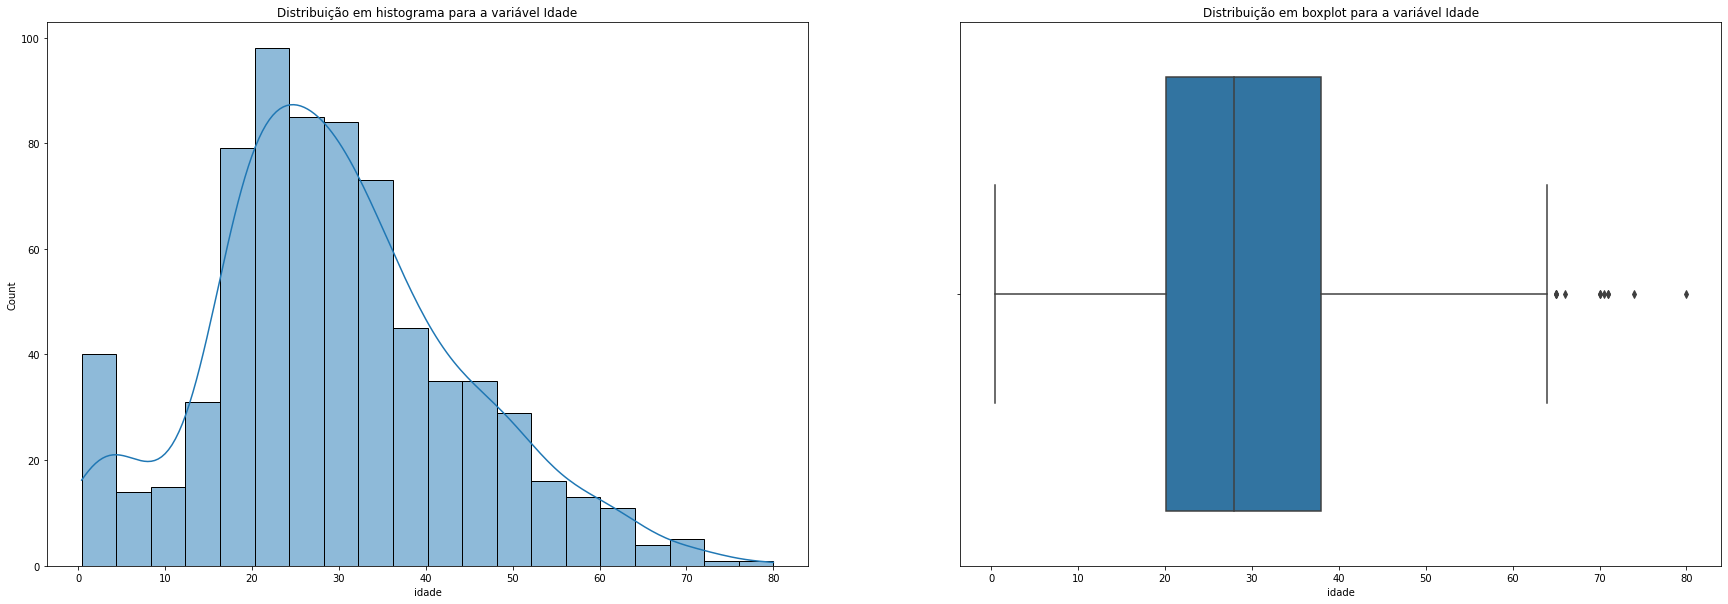

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

sns.histplot(data=df_num, x="idade", ax=ax[0], kde=True).set_title('Distribuição em histograma para a variável Idade')
sns.boxplot(data=df_num, x="idade", ax=ax[1]).set_title('Distribuição em boxplot para a variável Idade')

plt.show()

#### classe_bilhete

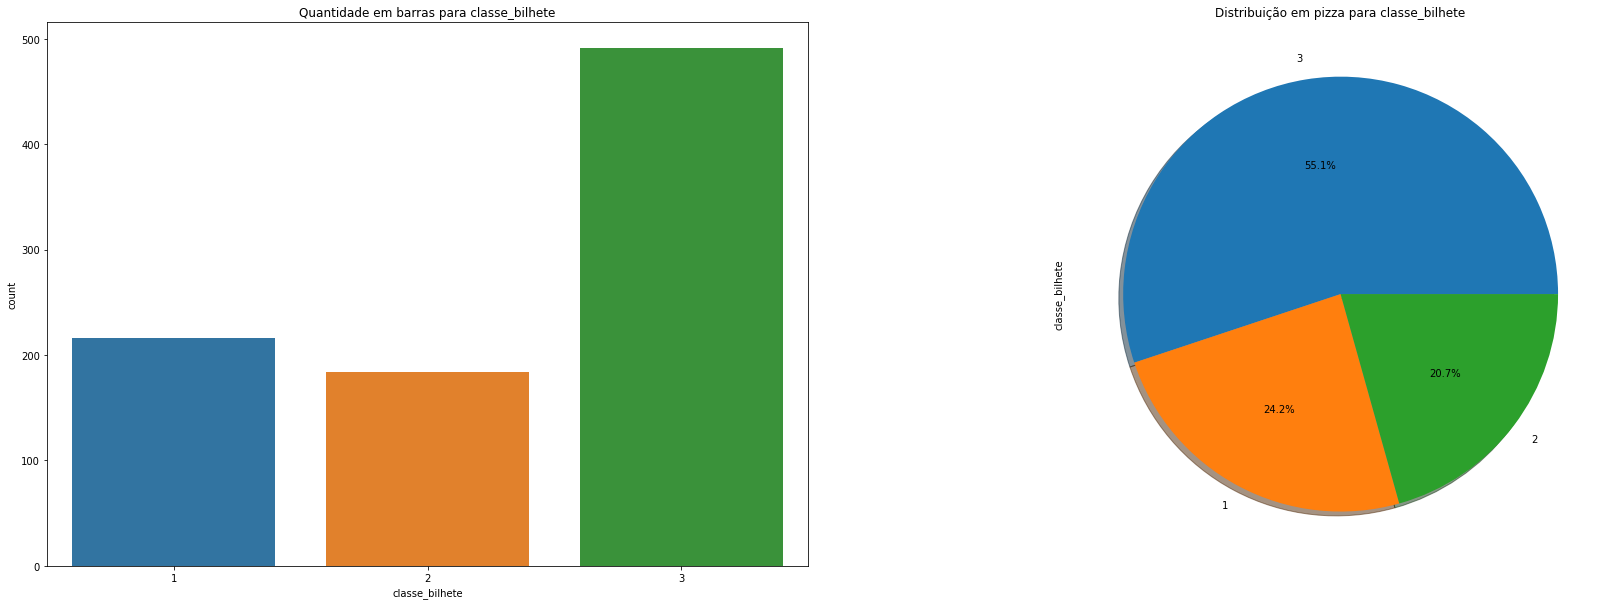

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

sns.countplot(data=df_num, x="classe_bilhete", ax=ax[0]).set_title("Quantidade em barras para classe_bilhete")
df_num["classe_bilhete"].value_counts().plot.pie(shadow=True, autopct="%1.1f%%", ax=ax[1], title="Distribuição em pizza para classe_bilhete")

plt.show()

#### irmaos_conjuges_abordo

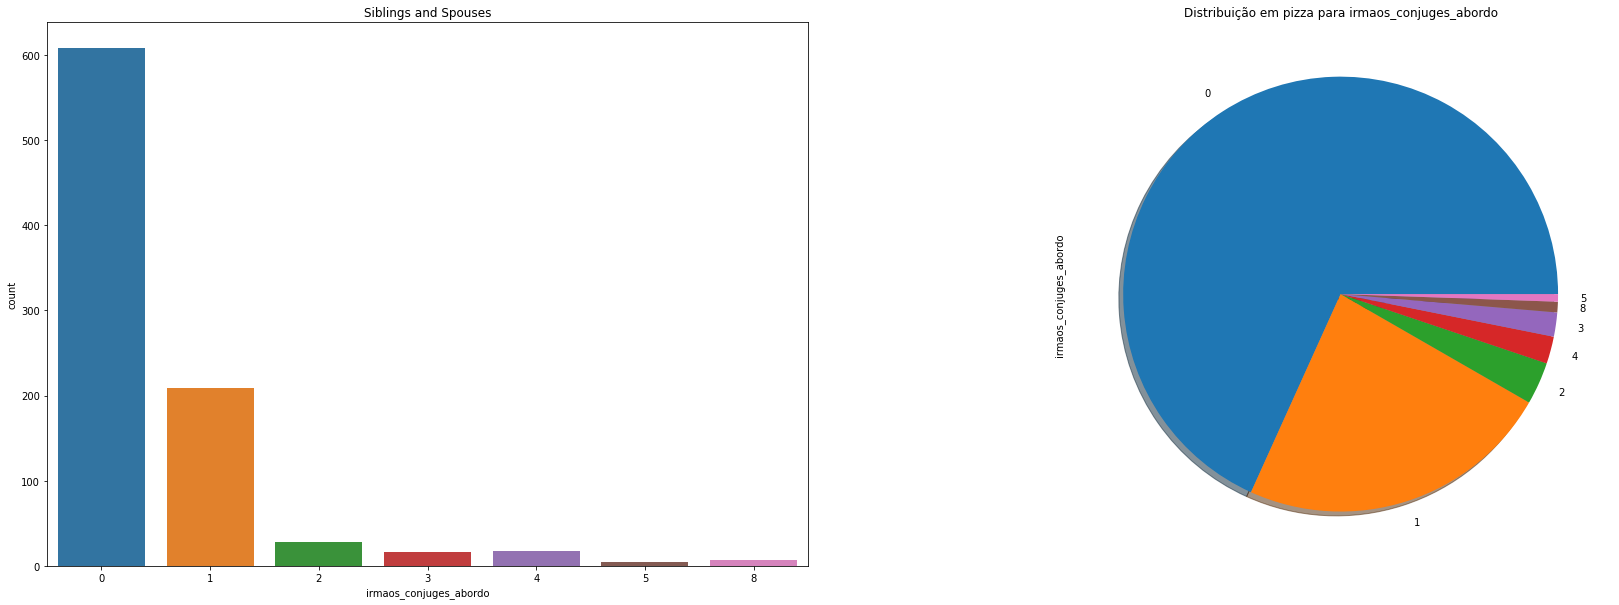

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

sns.countplot(data=df_num, x="irmaos_conjuges_abordo", ax=ax[0]).set_title("Quantidade em barras para irmaos_conjuges_abordo")
df_num["irmaos_conjuges_abordo"].value_counts().plot.pie(ax=ax[1], shadow=True, title="Distribuição em pizza para irmaos_conjuges_abordo")

plt.show()

#### pais_filhos_abordo

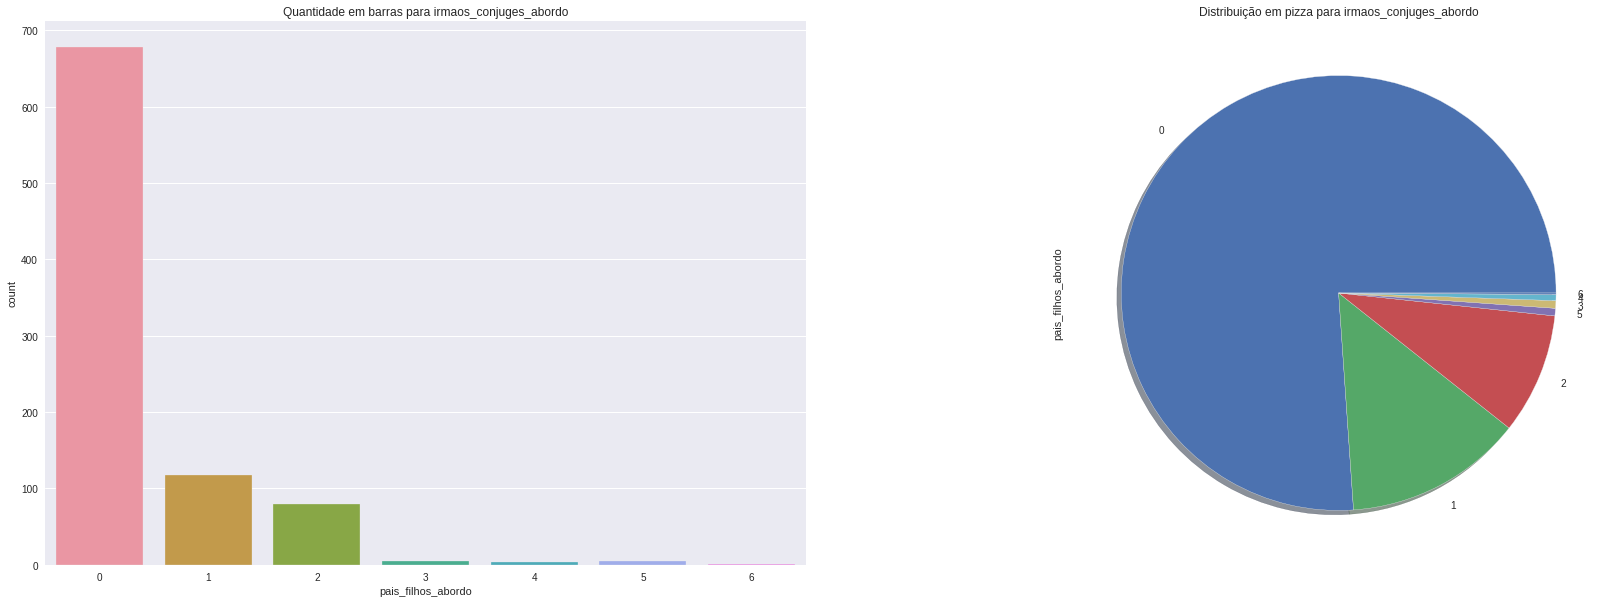

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

sns.countplot(data=df_num, x="pais_filhos_abordo", ax=ax[0]).set_title("Quantidade em barras para irmaos_conjuges_abordo")
df_num["pais_filhos_abordo"].value_counts().plot.pie(ax=ax[1], shadow=True, title="Distribuição em pizza para irmaos_conjuges_abordo")

plt.show()

#### preco_bilhete

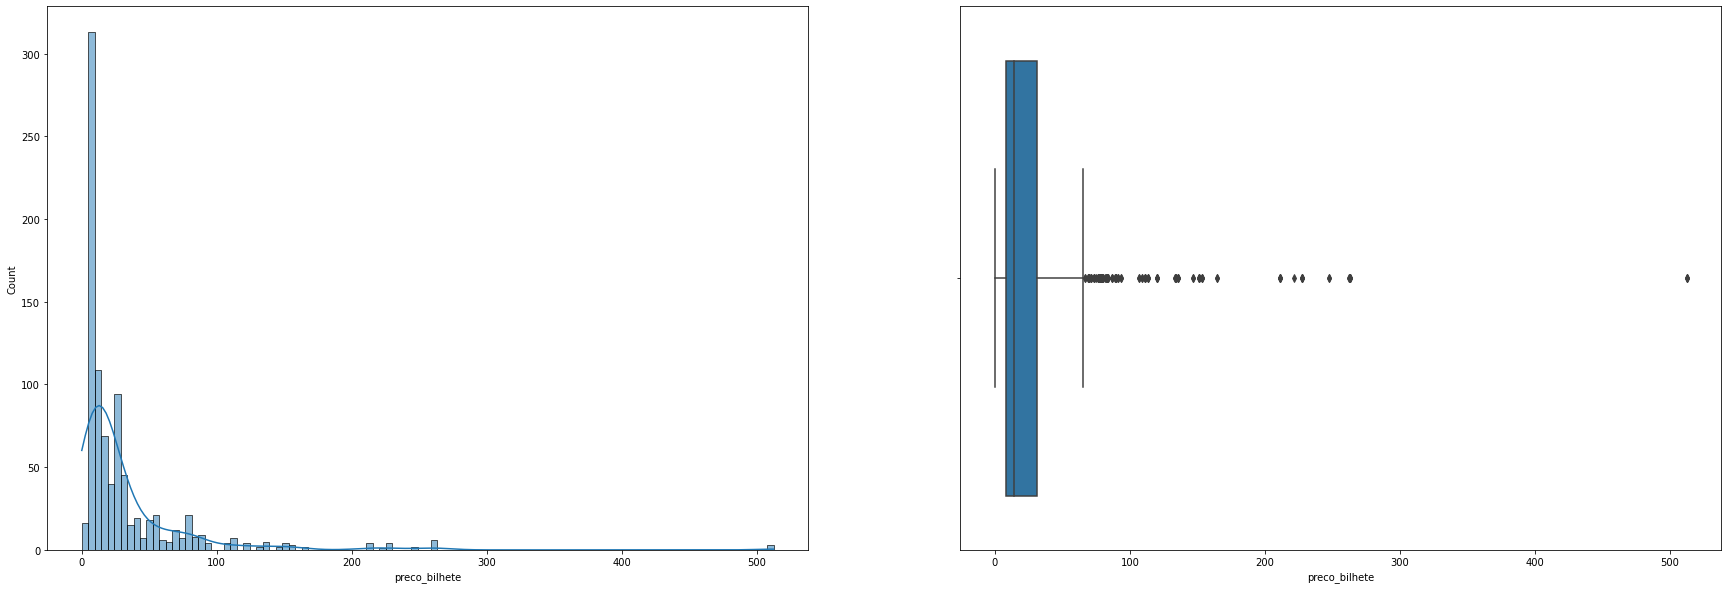

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(30,10))

sns.histplot(data=df_num, x="preco_bilhete", ax=ax[0], kde=True)
sns.boxplot(data=df_num, x="preco_bilhete", ax=ax[1])

plt.show()

### Handling with Outliers

#### Quartile Method

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   714 non-null    float64
 1   classe_bilhete          714 non-null    int64  
 2   irmaos_conjuges_abordo  714 non-null    int64  
 3   pais_filhos_abordo      714 non-null    int64  
 4   preco_bilhete           714 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [ ]:
Q1 = df_num.quantile(0.25, axis = 0)

In [ ]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
outliers = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))
outliers_iqr = df_num[outliers.any(axis=1)]
outliers_iqr

,idade,classe_bilhete,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
id_passageiro,,,,,
8,2.0,3,3,1,21.0750
14,39.0,3,1,5,31.2750
17,2.0,3,4,1,29.1250
25,8.0,3,3,1,21.0750
26,38.0,3,1,5,31.3875
...,...,...,...,...,...
852,74.0,3,0,0,7.7750
857,45.0,1,1,1,164.8667
859,24.0,3,0,3,19.2583


In [ ]:
outliers_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 8 to 886
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   151 non-null    float64
 1   classe_bilhete          151 non-null    int64  
 2   irmaos_conjuges_abordo  151 non-null    int64  
 3   pais_filhos_abordo      151 non-null    int64  
 4   preco_bilhete           151 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 7.1 KB


#### Standard Deviation Method (Desvio Padrão)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
imputer = IterativeImputer(estimator=DecisionTreeRegressor())
df_num = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)

In [ ]:
df_num

,idade,classe_bilhete,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
0,22.0,3.0,1.0,0.0,7.2500
1,38.0,1.0,1.0,0.0,71.2833
2,26.0,3.0,0.0,0.0,7.9250
3,35.0,1.0,1.0,0.0,53.1000
4,35.0,3.0,0.0,0.0,8.0500
...,...,...,...,...,...
709,39.0,3.0,0.0,5.0,29.1250
710,27.0,2.0,0.0,0.0,13.0000
711,19.0,1.0,0.0,0.0,30.0000
712,26.0,1.0,0.0,0.0,30.0000


In [ ]:
outliers_zscore = df_num[np.abs(stats.zscore(df_num)) > 3]
outliers_zscore

,idade,classe_bilhete,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
12,39.0,3.0,1.0,5.0,31.2750
15,2.0,3.0,4.0,1.0,29.1250
22,38.0,3.0,1.0,5.0,31.3875
23,19.0,1.0,3.0,2.0,263.0000
36,7.0,3.0,4.0,1.0,39.6875
44,11.0,3.0,5.0,2.0,46.9000
51,17.0,3.0,4.0,2.0,7.9250
54,16.0,3.0,5.0,2.0,46.9000
66,16.0,3.0,1.0,3.0,34.3750
67,23.0,1.0,3.0,2.0,263.0000


### Correlation

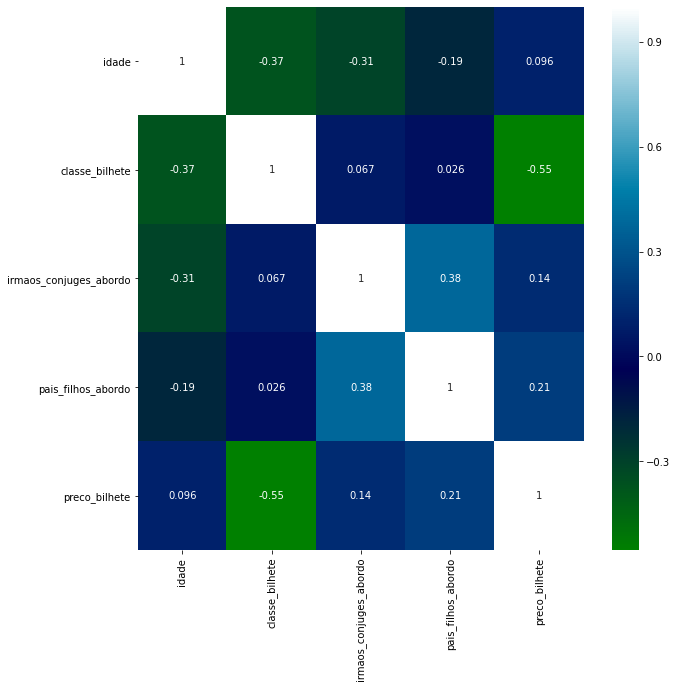

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_num.corr(), annot = True,cmap= 'ocean')

`Resposta: pelo heatmap acima, percebemos que as variáveis numéricas não tem muita correlação entre elas, destaque para a classe_bilhete com preço_bilhete que contém 0.55, mas que não é um valor tão algo, dado que pode ser até 1 (ou -1), então iremos carregar todos os dados, pois não há nenhuma redundância entre eles`

##  Visualize e entenda todas as colunas categóricas.
#### Perguntas guias para as categorias categóricas:
- Existem dados faltantes no seu conjunto? 
- Conseguimos extrair alguma informação nas colunas `numero_bilhete` e `cabine_numero`? ([Dica](https://pt.wikipedia.org/wiki/Instala%C3%A7%C3%B5es_da_primeira_classe_do_RMS_Titanic))
- Existe alguma casualidade ou correlação entre as categorias?
- Existe alguma relação entre a `classe_bilhete` e o `cabine_numero`?




In [ ]:
df_cat = df[categorica]

### Handling with Missing Values

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   genero          891 non-null    object
 1   numero_bilhete  891 non-null    object
 2   cabine_numero   204 non-null    object
 3   local_embarque  889 non-null    object
 4   sobreviveu      891 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 35.7+ KB


In [ ]:
df_cat.isna().sum()

genero              0
numero_bilhete      0
cabine_numero     687
local_embarque      2
sobreviveu          0
dtype: int64

### Relation between cabine_numero and numero_bilhete

In [ ]:
df[["numero_bilhete", "cabine_numero"]].dropna()

,numero_bilhete,cabine_numero
id_passageiro,,
2,PC 17599,C85
4,113803,C123
7,17463,E46
11,PP 9549,G6
12,113783,C103
...,...,...
872,11751,D35
873,695,B51 B53 B55
880,11767,C50


In [ ]:
df[["numero_bilhete", "cabine_numero"]].dropna().value_counts()

numero_bilhete  cabine_numero
113760          B96 B98          4
19950           C23 C25 C27      4
113781          C22 C26          3
230080          F2               3
WE/P 5735       B22              2
                                ..
PC 17595        C49              1
248698          D56              1
248733          F33              1
2668            F E69            1
13567           B41              1
Length: 161, dtype: int64

In [ ]:
df[["numero_bilhete", "cabine_numero"]].dropna().value_counts().reset_index()

,numero_bilhete,cabine_numero,0
0,113760,B96 B98,4
1,19950,C23 C25 C27,4
2,113781,C22 C26,3
3,230080,F2,3
4,WE/P 5735,B22,2
...,...,...,...
156,PC 17595,C49,1
157,248698,D56,1
158,248733,F33,1
159,2668,F E69,1


In [ ]:
df.groupby(["numero_bilhete", "cabine_numero"]).sum()

sobreviveu  classe_bilhete  idade  \
numero_bilhete    cabine_numero                                      
110152            B77                     2               2   63.0   
                  B79                     1               1   16.0   
110413            E67                     1               2   91.0   
                  E68                     1               1   18.0   
110465            A14                     0               1    0.0   
...                                     ...             ...    ...   
SC/AH Basle 541   D                       1               2   23.0   
SC/Paris 2163     D                       0               2   36.0   
SOTON/O.Q. 392078 E10                     1               3   32.0   
W.E.P. 5734       E31                     0               1   46.0   
WE/P 5735         B22                     1               2  106.0   

                                 irmaos_conjuges_abordo  pais_filhos_abordo  \
numero_bilhete    cabine_numero                                               
110152            B77                                 0                   0   
                  B79                                 0                   0   
110413            E67                                 2                   2   
                  E68                                 0                   2   
110465            A14                                 0                   0   
...                                                 ...                 ...   
SC/AH Basle 541   D                                   0                   0   
SC/Paris 2163     D                                   0                   0   
SOTON/O.Q. 392078 E10                                 0                   0   
W.E.P. 5734       E31                                 1                   0   
WE/P 5735         B22                                 1                   3   

                                 preco_bilhete  
numero_bilhete    cabine_numero                 
110152            B77                 173.0000  
                  B79                  86.5000  
110413            E67                 159.3000  
                  E68                  79.6500  
110465            A14                  52.0000  
...                                        ...  
SC/AH Basle 541   D                    13.7917  
SC/Paris 2163     D                    12.8750  
SOTON/O.Q. 392078 E10                   8.0500  
W.E.P. 5734       E31                  61.1750  
WE/P 5735         B22                 142.0000  

[161 rows x 6 columns]

### Correlation

Data transforming

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   genero          891 non-null    object
 1   numero_bilhete  891 non-null    object
 2   cabine_numero   204 non-null    object
 3   local_embarque  889 non-null    object
 4   sobreviveu      891 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 75.7+ KB


In [ ]:
categorica

['genero', 'numero_bilhete', 'cabine_numero', 'local_embarque', 'sobreviveu']

In [ ]:
pd.get_dummies(df_cat, prefix=['genero', 'numero_bilhete', 'cabine_numero', 'local_embarque'])

,sobreviveu,genero_F,genero_M,numero_bilhete_110152,numero_bilhete_110413,numero_bilhete_110465,numero_bilhete_110564,numero_bilhete_110813,numero_bilhete_111240,numero_bilhete_111320,...,cabine_numero_F G73,cabine_numero_F2,cabine_numero_F33,cabine_numero_F38,cabine_numero_F4,cabine_numero_G6,cabine_numero_T,local_embarque_Cherbourg,local_embarque_Queenstown,local_embarque_Southampton
id_passageiro,,,,,,,,,,,,,,,,,,,,,
1,False,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,True,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,True,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,True,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,False,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,False,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,True,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


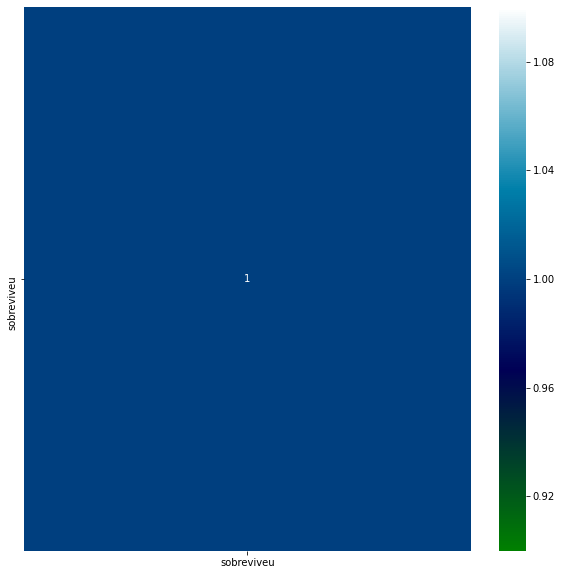

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_cat.corr(), annot = True,cmap= 'ocean')

### Relation between cabine_numero and classe_bilhete

In [ ]:
df[["classe_bilhete", "cabine_numero"]].dropna().value_counts()

classe_bilhete  cabine_numero
3               G6               4
1               C23 C25 C27      4
                B96 B98          4
2               E101             3
                D                3
                                ..
1               D15              1
                D19              1
                D21              1
                D28              1
                A10              1
Length: 147, dtype: int64

In [ ]:
df_cat

,genero,numero_bilhete,cabine_numero,local_embarque,sobreviveu
id_passageiro,,,,,
1,M,A/5 21171,NaN,Southampton,False
2,F,PC 17599,C85,Cherbourg,True
3,F,STON/O2. 3101282,NaN,Southampton,True
4,F,113803,C123,Southampton,True
5,M,373450,NaN,Southampton,False
...,...,...,...,...,...
887,M,211536,NaN,Southampton,False
888,F,112053,B42,Southampton,True
889,F,W./C. 6607,NaN,Southampton,False


## Perguntas chave para as categorias categóricas:
- Há alguma influência de pertencer a algum grupo de alguma cabine na sua sobrevivência?
- Há algum padrão no `numero_bilhete`?
- Há algum padrão na `cabine_numero`?




### Há alguma influência de pertencer a algum grupo de alguma cabine na sua sobrevivência?

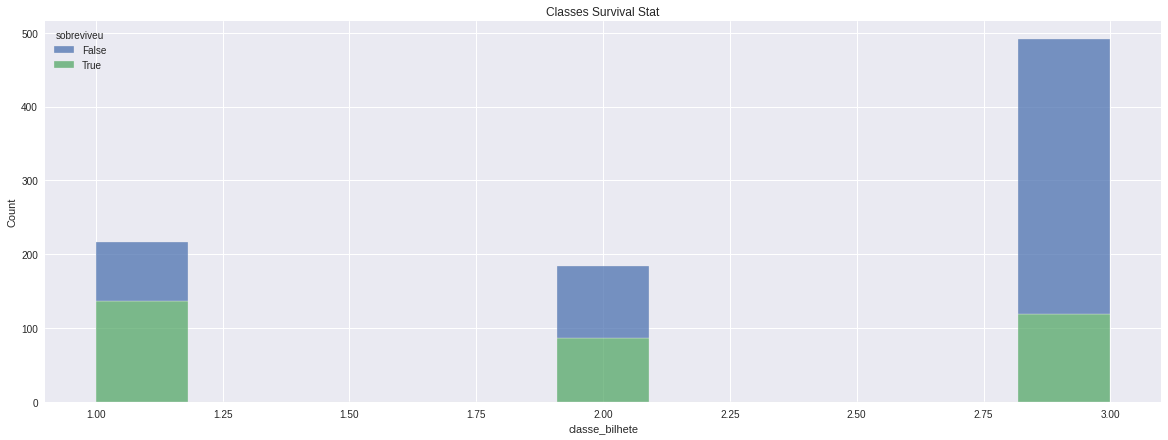

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="classe_bilhete", hue="sobreviveu", multiple="stack", ax=ax).set_title("Classe bilhete versus sobrevivência")
plt.show()

Pode-se perceber que mais pessoas da classe 3 sobreviveram ao Titanic, talvez isso seja um fator a perceber

### Há algum padrão em numero_bilhete?

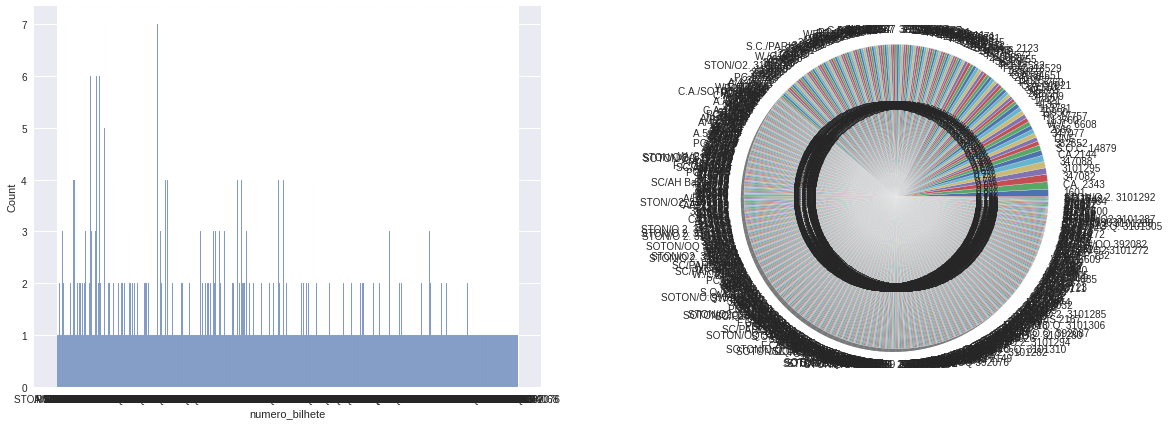

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="numero_bilhete", ax=ax[0])
df["numero_bilhete"].value_counts().plot.pie(shadow=True, autopct="%1.1f%%", ax=ax[1])

plt.show()

Não tem padrão

### Há algum padrão em cabine_numero?

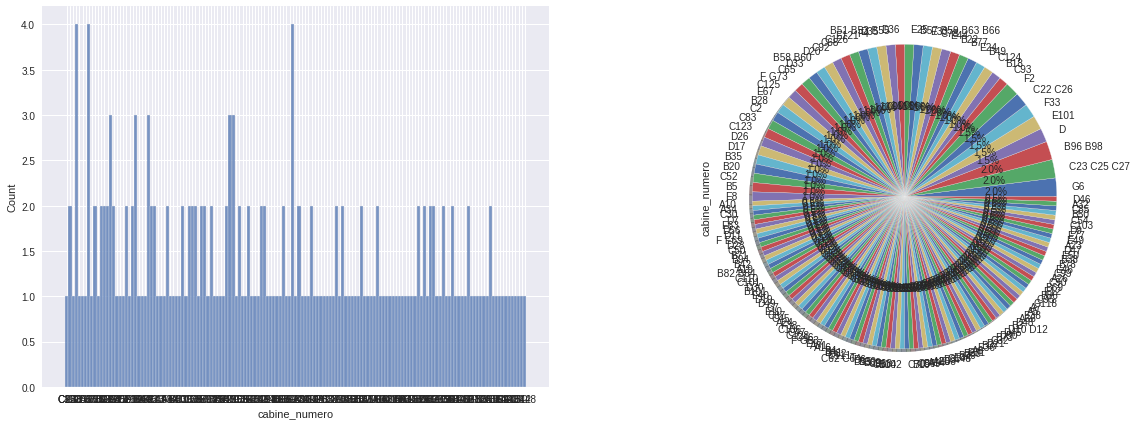

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="cabine_numero", ax=ax[0])
df["cabine_numero"].value_counts().plot.pie(shadow=True, autopct="%1.1f%%", ax=ax[1])

plt.show()

Não tem padrão

# Perguntas do Desafio:

### Qual o fator que foi mais importante e menos importante para determinar a sobrevivência para esta população?



In [ ]:
classe = df[["classe_bilhete", "sobreviveu"]].groupby("classe_bilhete", as_index = False).mean()

classe.sort_values(by="sobreviveu",ascending = False)

,classe_bilhete,sobreviveu
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
# Sex vs Survived
genero = df[["genero", "sobreviveu"]].groupby("genero", as_index = False).mean()
genero.sort_values(by="sobreviveu",ascending = False)     # sort the value by "Survived"

,genero,sobreviveu
0,F,0.742038
1,M,0.188908


In [ ]:
# Embarked vs Survived
embarque = df[["local_embarque", "sobreviveu"]].groupby("local_embarque", as_index = False).mean()
embarque.sort_values(by="sobreviveu",ascending = False)     # sort the value by "Survived"

,local_embarque,sobreviveu
0,Cherbourg,0.553571
1,Queenstown,0.389610
2,Southampton,0.336957


In [ ]:
# SibSp vs Survived
irmaos = df[["irmaos_conjuges_abordo", "sobreviveu"]].groupby("irmaos_conjuges_abordo", as_index = False).mean()
irmaos.sort_values(by="sobreviveu",ascending = False)     # sort the value by "Survived"

,irmaos_conjuges_abordo,sobreviveu
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# Parch vs Survived
pais = df[["pais_filhos_abordo", "sobreviveu"]].groupby("pais_filhos_abordo", as_index = False).mean()
pais.sort_values(by="sobreviveu",ascending = False)     # sort the value by "Survived"

,pais_filhos_abordo,sobreviveu
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Sua resposta: Dentro das variáveis que podem estabelecer um certo grau de sentido entre a relação sobrevivência, o gênero foi o que mais se destacou nesse quesito, pois a quantidade de mulheres que sobreviveram foram bem maiores do que os homens. Pessoas que moram em Cherbourg também tiveram uma maior taxa de sobrevivência, além também daqueles que possuiam um grau menor de quantidade de entes, familiares ou conjuges, alem de que a classe 1, que é a maior, possuiu um maior grau de sobrevivência.

### Você pode dizer que houve alguma influência do poder aquisitivo na sobrevivência do acidente? 



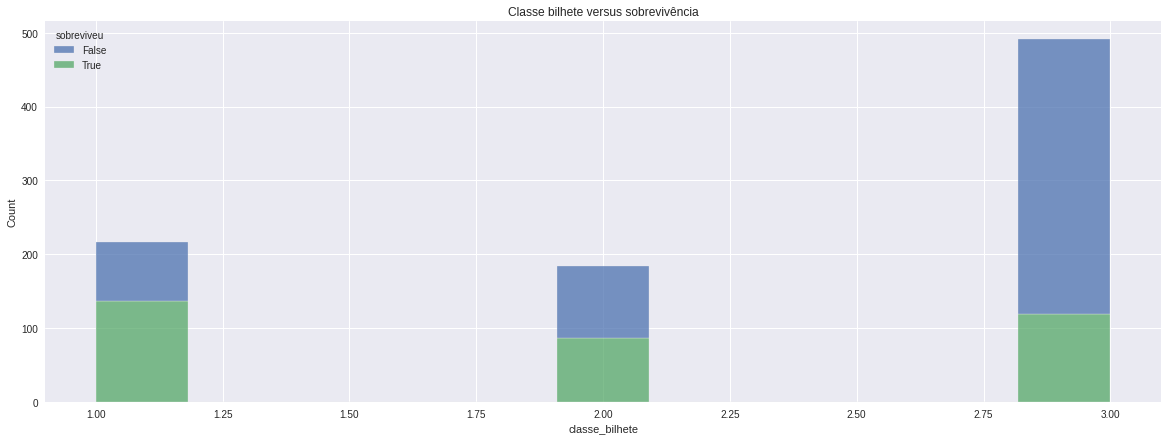

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="classe_bilhete", hue="sobreviveu", multiple="stack", ax=ax).set_title("Classe bilhete versus sobrevivência")
plt.show()

Sua resposta: 

Pelo gráfico acima, pode-se tirar conclusão de que provavelmente a classe foi algo importante para a sobrevivência, pois se destaca a classe 1, onde houve uma maior quantidade de sobreviventes do que as demais classes mais "baixas" 2 e 3.

### O protocolo marítimo da época do Titanic tinha foco em dar prioridade a crianças e mulheres, analisando os dados podemos dizer se este protocolo foi seguido? 



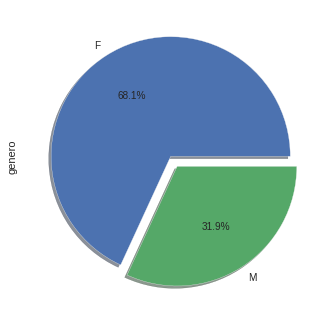

In [ ]:
df_m = df[(df["sobreviveu"] == True) & (df["genero"] == "M")]
df_f = df[(df["sobreviveu"] == True) & (df["genero"] == "F")]

df_sur = pd.concat([df_m, df_f])
df_sur["genero"].value_counts().plot.pie(explode=[0, 0.1], shadow=True, autopct="%1.1f%%")
plt.show()

Pelo grafico acima, assume-se que a taxa de sobrevivencia se concentrou em publico feminino.

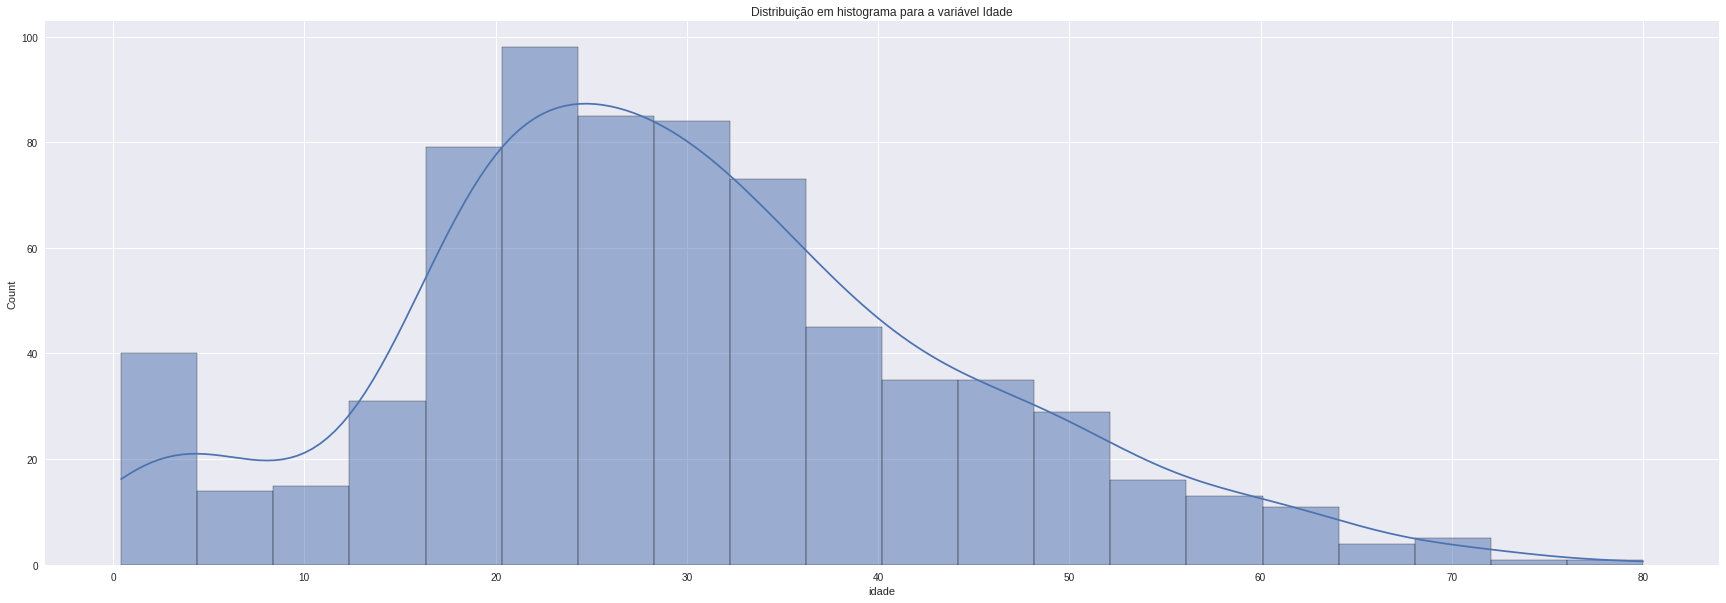

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))

sns.histplot(data=df_num, x="idade", ax=ax, kde=True).set_title('Distribuição em histograma para a variável Idade')

plt.show()

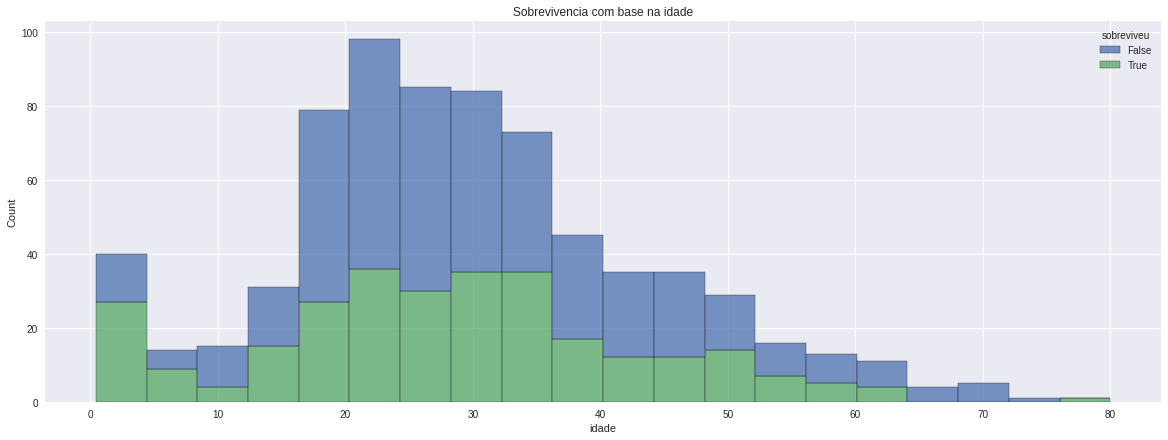

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="idade", hue="sobreviveu", multiple="stack", ax=ax).set_title("Sobrevivencia com base na idade")
plt.show()

Pela analises dos graficos e consequentemente pela proporção entre sobreviventes;nao-sobreviventes, percebe-se que realmente foram priorizados as pessoas com idade menor que 10 (crianças)

Sua resposta: .....

### Ter uma família no barco influenciou negativamente ou positivamente para a sua sobrevivência?



In [ ]:
# SibSp vs Survived
Sib_Sur = df[["irmaos_conjuges_abordo", "sobreviveu"]].groupby("irmaos_conjuges_abordo", as_index = False).mean()
Sib_Sur.sort_values(by="sobreviveu",ascending = False)     # sort the value by "Survived"

,irmaos_conjuges_abordo,sobreviveu
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# Parch vs Survived
Par_Sur = df[["pais_filhos_abordo", "sobreviveu"]].groupby("pais_filhos_abordo", as_index = False).mean()
Par_Sur.sort_values(by="sobreviveu",ascending = False)     # sort the value by "Survived"

,pais_filhos_abordo,sobreviveu
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Sua resposta: 

Pelos contas acima, percebe-se que existe uma tendência em quanto mais relações pais/filhos ou irmãos/conjuges tiver, mais a chance de não sobreviver ao acidente, pois a taxa de sobrevivência normalmente está maior para aqueles que tem poucas quantidades ou nenhuma

### Qual o perfil de quem não sobreviveu? E qual é o perfil de quem sobreviveu?
- Entenda Perfil como: Gênero, Idade e Classe Social. Caso você identifique alguma nova característica pode adicioná-la ao perfil.




classe_bilhete, idade, genero

In [ ]:
df

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,numero_bilhete,preco_bilhete,cabine_numero,local_embarque
id_passageiro,,,,,,,,,,
1,False,3,M,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,True,1,F,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,True,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,True,1,F,35.0,1,0,113803,53.1000,C123,Southampton
5,False,3,M,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...
887,False,2,M,27.0,0,0,211536,13.0000,NaN,Southampton
888,True,1,F,19.0,0,0,112053,30.0000,B42,Southampton
889,False,3,F,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton


In [ ]:
(df[['local_embarque', 'genero', 'classe_bilhete','sobreviveu']].groupby(['local_embarque', 'classe_bilhete', 'genero']).mean()*100)

sobreviveu
local_embarque classe_bilhete genero            
Cherbourg      1              F        97.674419
                              M        40.476190
               2              F       100.000000
                              M        20.000000
               3              F        65.217391
                              M        23.255814
Queenstown     1              F       100.000000
                              M         0.000000
               2              F       100.000000
                              M         0.000000
               3              F        72.727273
                              M         7.692308
Southampton    1              F        95.833333
                              M        35.443038
               2              F        91.044776
                              M        15.463918
               3              F        37.500000
                              M        12.830189

In [ ]:
(df[['idade', 'genero', 'classe_bilhete','sobreviveu']].groupby(['idade', 'classe_bilhete', 'genero']).mean()*100)

,,,sobreviveu
idade,classe_bilhete,genero,
0.42,3,M,100.0
0.67,2,M,100.0
0.75,3,F,100.0
0.83,2,M,100.0
0.92,1,M,100.0
...,...,...,...
70.00,2,M,0.0
70.50,3,M,0.0
71.00,1,M,0.0


In [ ]:
df_x = df[["classe_bilhete", "idade", "genero", "sobreviveu"]].groupby(["genero", "idade", "classe_bilhete"]).sum()
df_x[df_x["sobreviveu"] == 0]

sobreviveu
genero idade classe_bilhete            
F      2.0   1                        0
       3.0   3                        0
       6.0   3                        0
       8.0   3                        0
       9.0   3                        0
...                                 ...
M      70.0  1                        0
             2                        0
       70.5  3                        0
       71.0  1                        0
       74.0  3                        0

[119 rows x 1 columns]

In [ ]:
Par_Sur = df[["pais_filhos_abordo", "sobreviveu"]].groupby("pais_filhos_abordo", as_index = False).mean()

Sua resposta: .....

Se você sobreviveu até aqui, meus parabéns! =D